# ECE-GY 5373 Lab 2 Report (gk1675)

In [1]:
run ../styles.ipynb

## Exercise 1

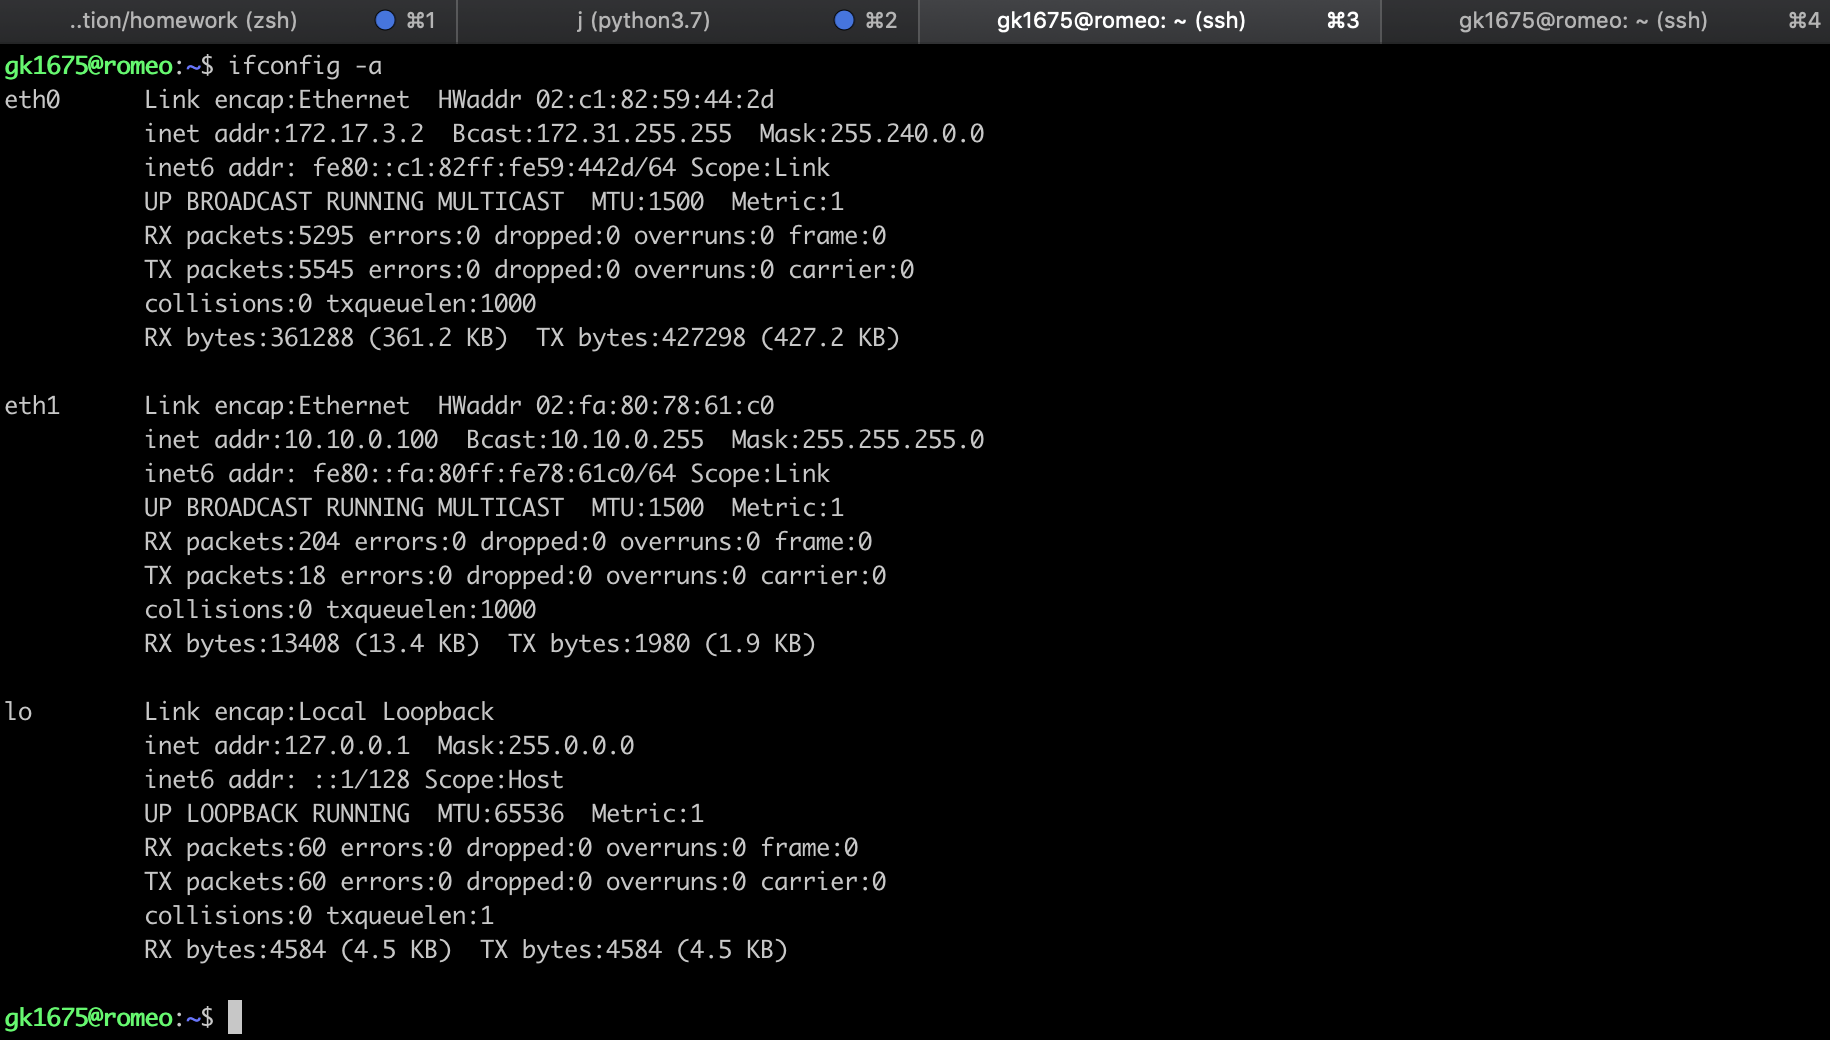

***network interface eth0***:  
- IP address: 172.17.3.2   
- net mask: 255.240.0.0   

***network interface eth1***:  
- IP address: 10.10.0.100
- net mask: 255.255.255.0

***network interface lo***:  
- IP address: 127.0.0.1
- net mask: 255.0.0.0

Q: How many interfaces does the host have? List all the interfaces found, give their names, and explain their functions briefly.   

A: 3, as follows.

| interface name | functions | MTU | 
| --- | --- | --- |
| eth0 | the first ethernet interface | 1500 |
| eth1 | the additional ethernet interface | 1500 |
| lo | the first ethernet interface (the system use it to communicate with itself) | 65536 |

Q: Consider the network that the experiment interface is connected to. Is the network subnetted? What is the reasoning for your answer?   

A: Yes, it is subnetted. Because all the hosts in this network have subnet mask 255.255.255.0, and their IP address all have the pattern "10.10.0.xxx", which means they belong to the same subnet.

## Exercise 2

Q: From the ping output, is the 127.0.0.1 interface on? Can you see any ICMP message sent from your host in the tcpdump output? Why? (What if you would run ping -c 3 10.10.0.100 - your experiment interface IP address - and run tcpdump listening on eth1. Do you see the ICMP packets in your tcpdump output?)

A: the 127.0.0.1 interface is on. However, no ICMP message is sent from the hose i the `tcpdump` output. This is because the system is communicating with itself. 
When run `ping -c 3 10.10.0.100`, there is also no ICMP packets in the `tcpdump` output.

## Exercise 4

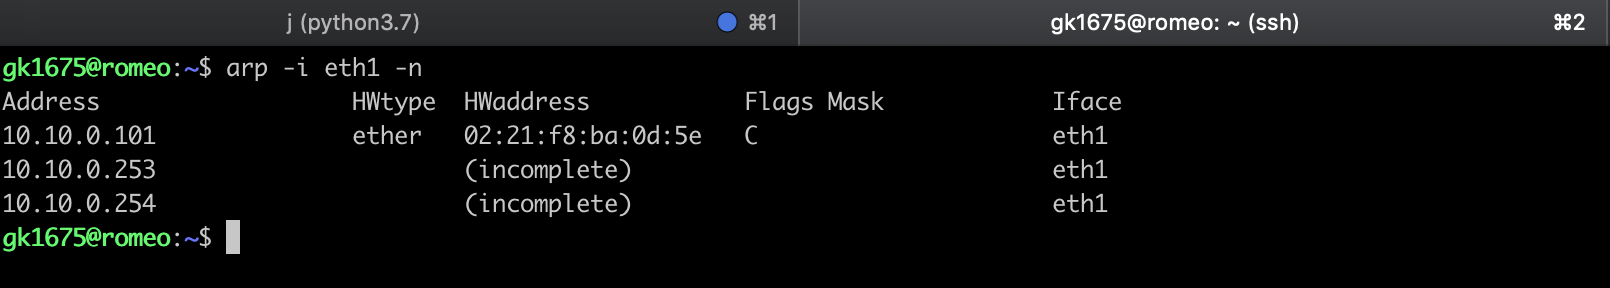

### tcpdump output 

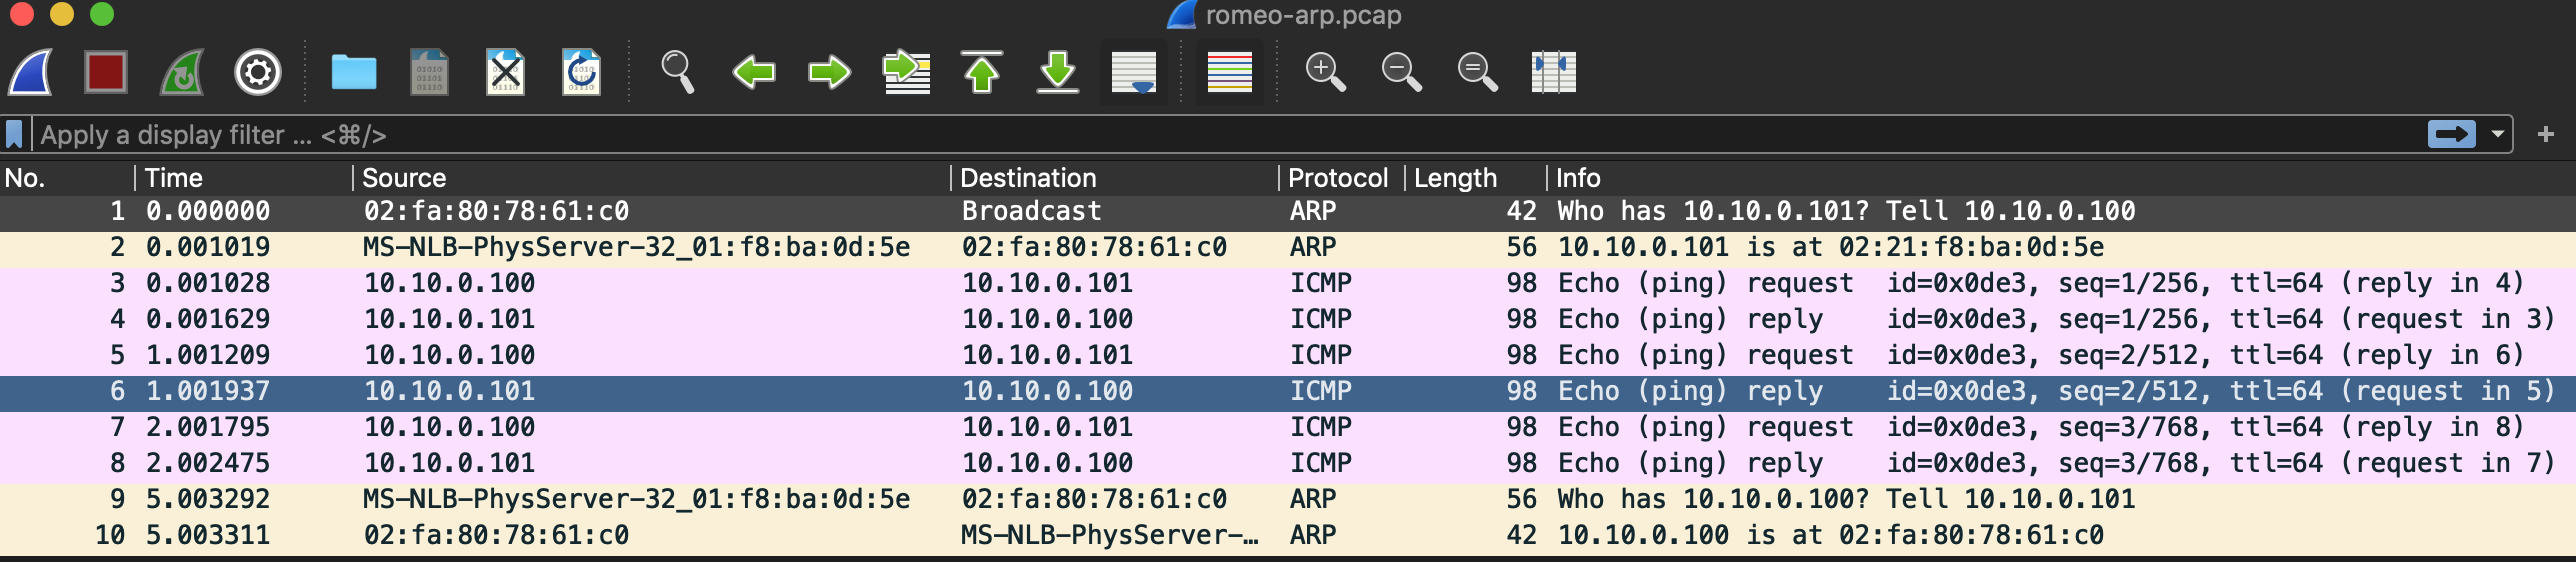

Q: From the saved tcpdump output, explain how ARP operates.

A: With Address Resolution Protocol (ARP), the source host first sends a broadcast to ask who has the target IP address, and requests the target to tell the source. When the target host receives the message, it tells the sender its MAC address. ARP also saves a table that can map the IP address to MAC address by caching them.

Q: What is the target IP address in the ARP request?

A: 10.10.0.101

Q: At the MAC layer, what is the destination Ethernet address of the frame carrying the ARP request?

A: 02:21:f8:ba:0d:5e

Q: What is the frame type field in the Ethernet frame?

A: ethernet II (ether)

## Exercise 5

### tcpdump output 

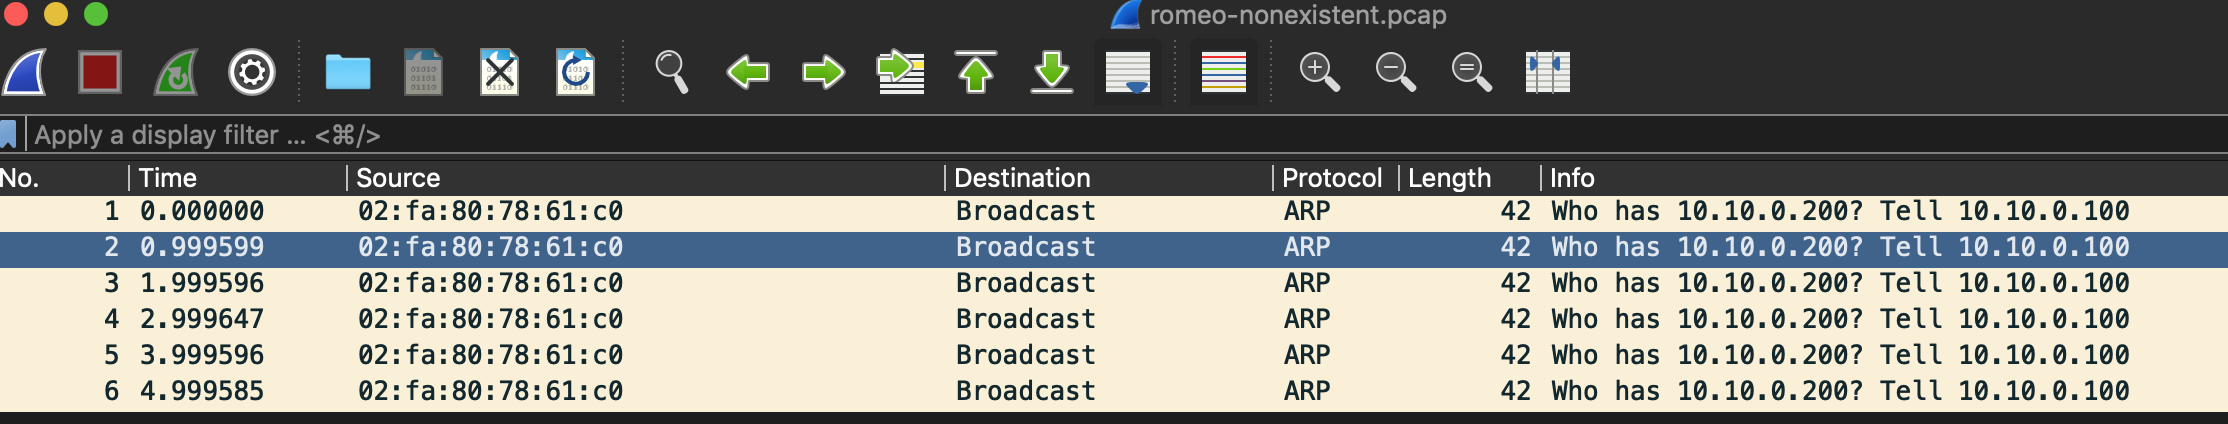

Lab report: From the tcpdump output, describe how the ARP timeout and retransmission were performed.

A: The source host sends a broadcast messages, if no response is received at timeout, it retransmits the data. Until a specific number of retransmission is reached, the source host gives up trying.

Q: How many attempts were made to resolve a non-existing IP address?

A: 6 attempts were made to resolve a non-existing IP address.

## Exercise 7

Q: What is the purpose gratuitous ARP?

A: The purpose of the gratuitous ARP is to announce or update its IP to MAC mapping to the entire network.

Q: Include a screenshot from Wireshark showing the ARP header of a gratuitous ARP. List the sender IP address, target IP address, sender MAC address, and target MAC address of the gratuitous ARP that you showed.

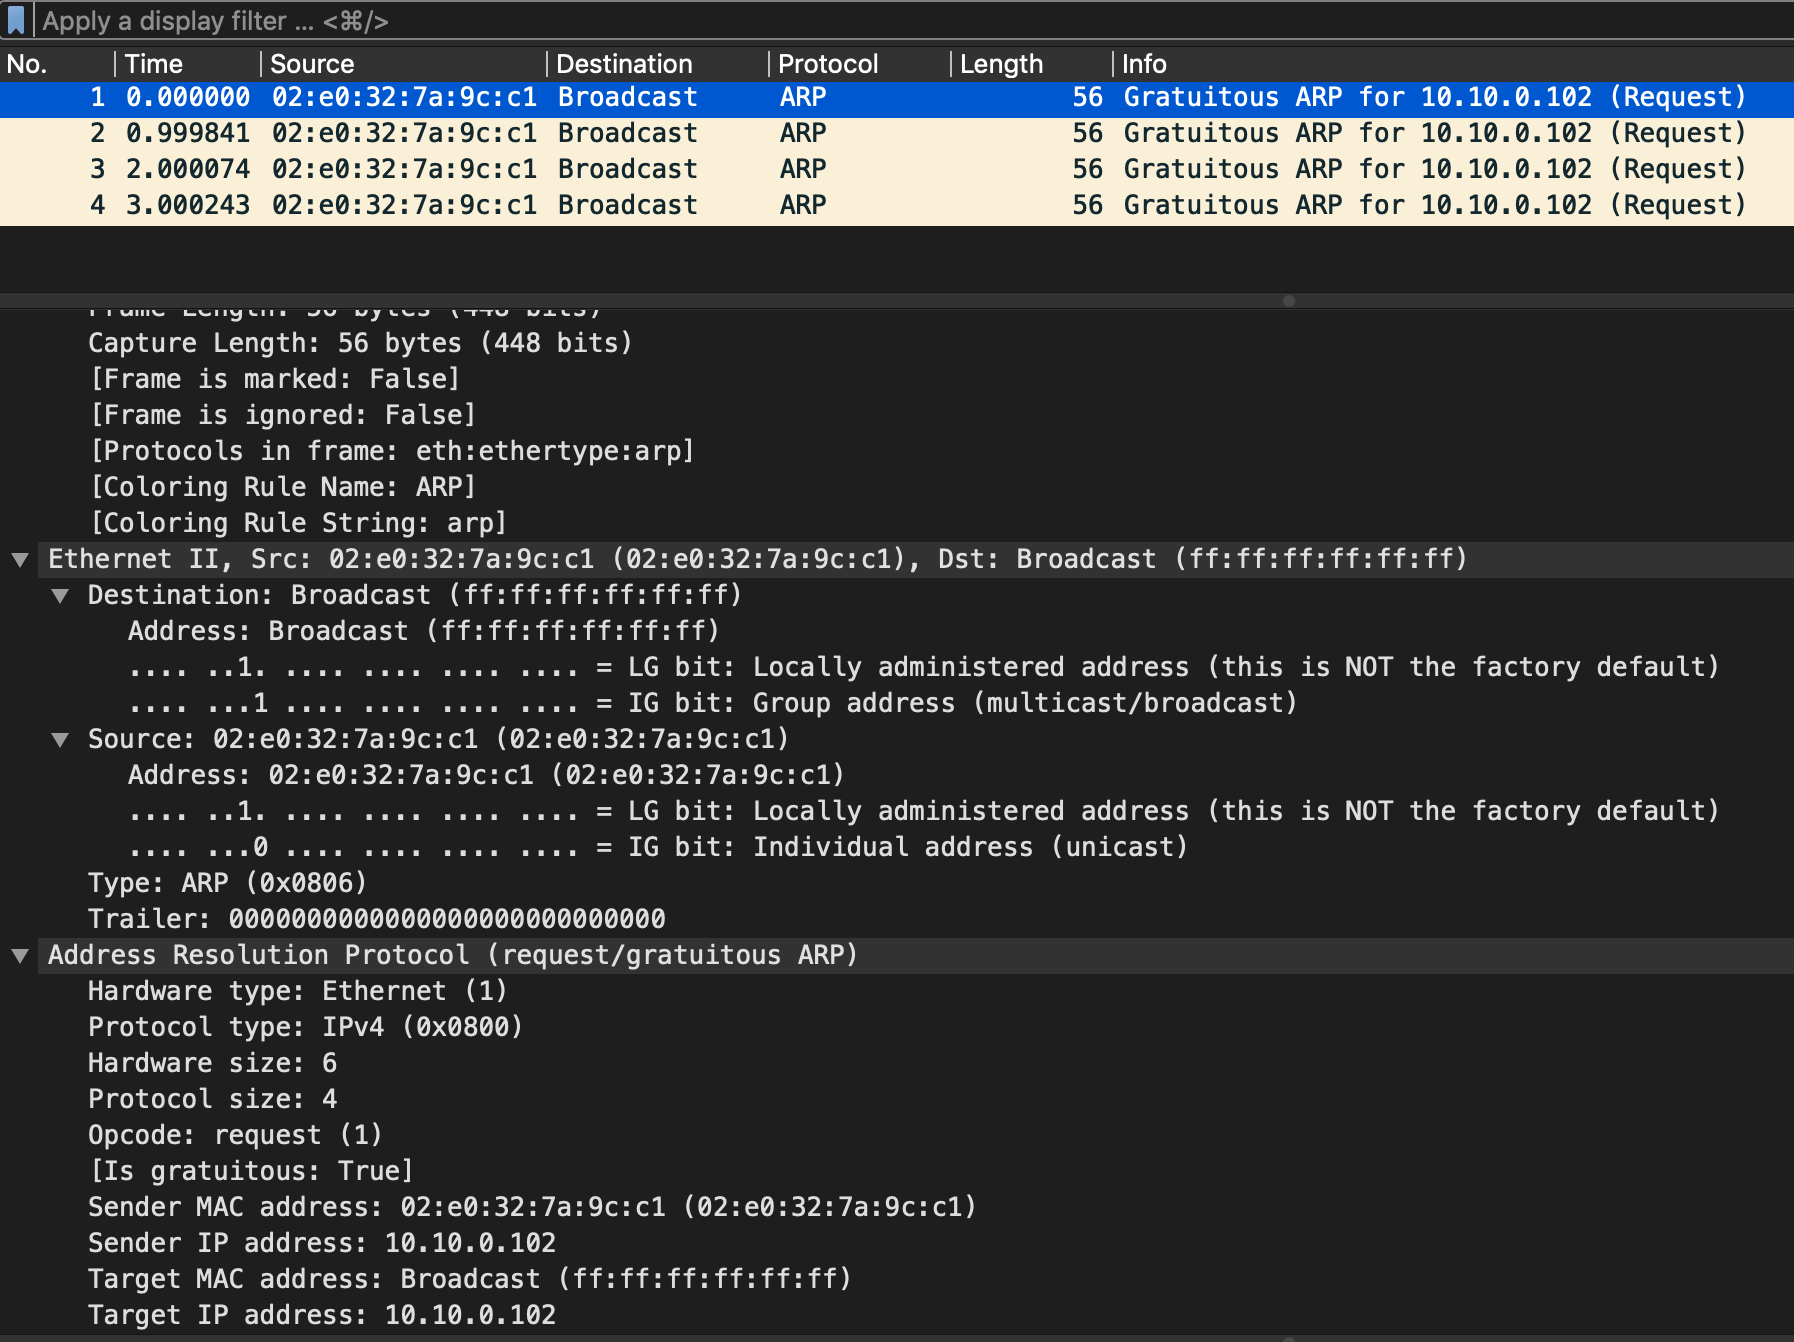

- sender IP address: 10.10.0.102  
- sender MAC address: 02:e0:32:7a:9c:c1
- target IP address: 10.10.0.102 
- target MAC address: Broadcast (ff:ff:ff:ff:ff:ff)

Q: Is there a reply to the gratuitous ARP? Why or why not?

A: No. Because the purpose of a gratuitous ARP is to notify other devices the MAC address of itself, and thus no reply is required.

## Exercise 8

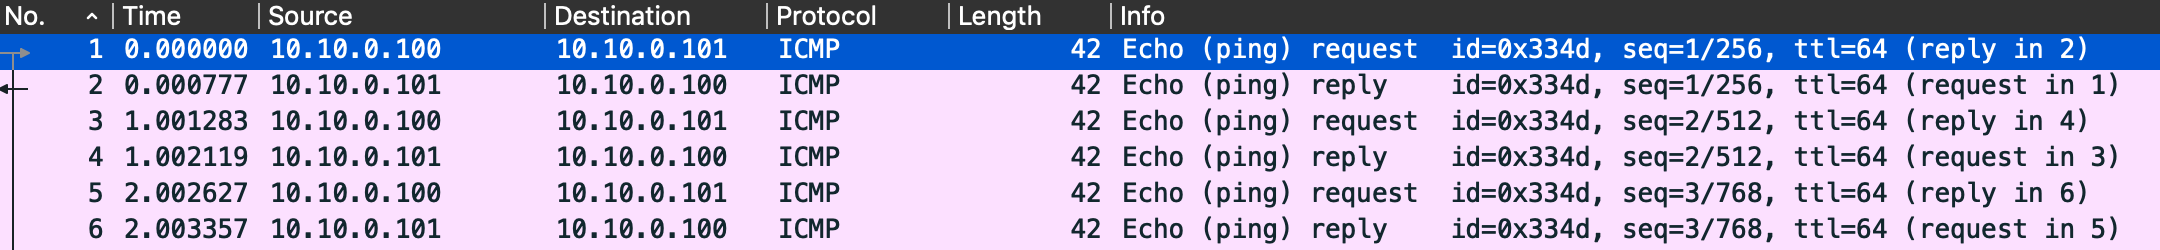

Q: What ICMP messages are used by ping?   

A: Echo request and reply.

## Exercise 9

Q: Study the saved ICMP port unreachable message (see Fig. 2.7 in the text book). Why are the first 8 bytes of the original IP datagram payload included in the ICMP message?

A: the first 8 bytes of the original IP payload contain the source and destination port numbers in the UDP or TCP header.

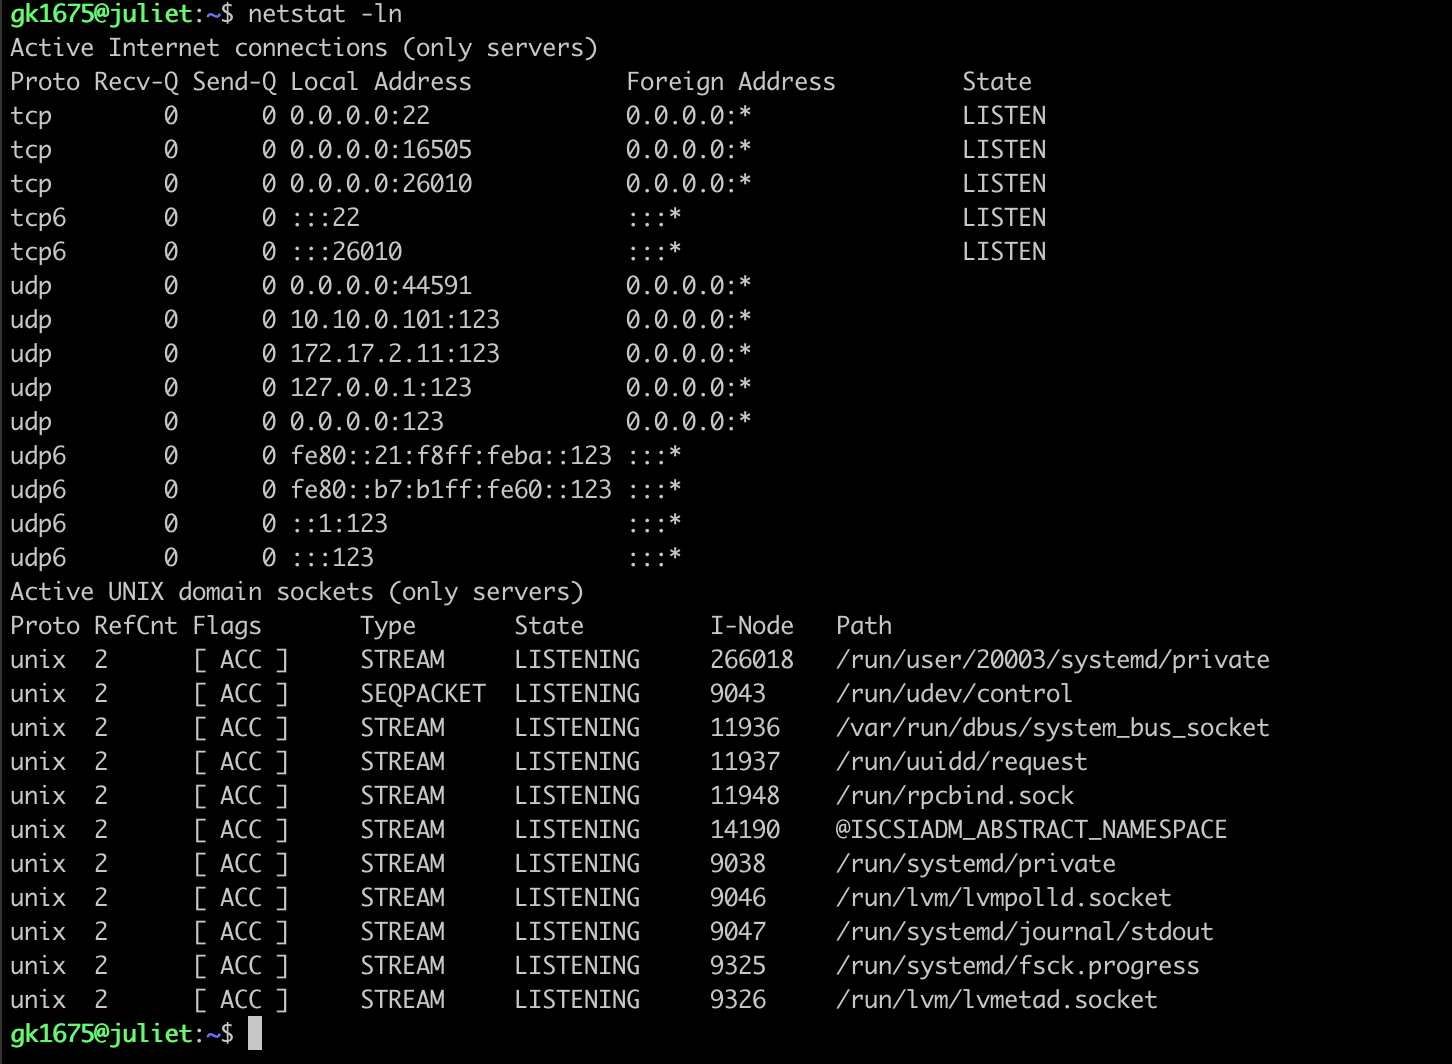

Q: What transport layer protocol (UDP or TCP) and port number did you attempt to contact "juliet" on? Is any service listening on that port? Use your lab output to explain.

A: transport layer protocol is UDP, with port number 123. No service is listening on that port. (loopback address is 127.0.0.1)

## Exercise 10

- default gateway: 172.16.0.1
- public (foreign) address: 24.90.29.206

Add a route to the routing table specific to the network that we connect from, and delete the default gateway route without losing your SSH connection via following commands:   
`sudo route add -net 24.0.0.0/8 gw 172.16.0.1`   
`sudo route del default gw 172.16.0.1`

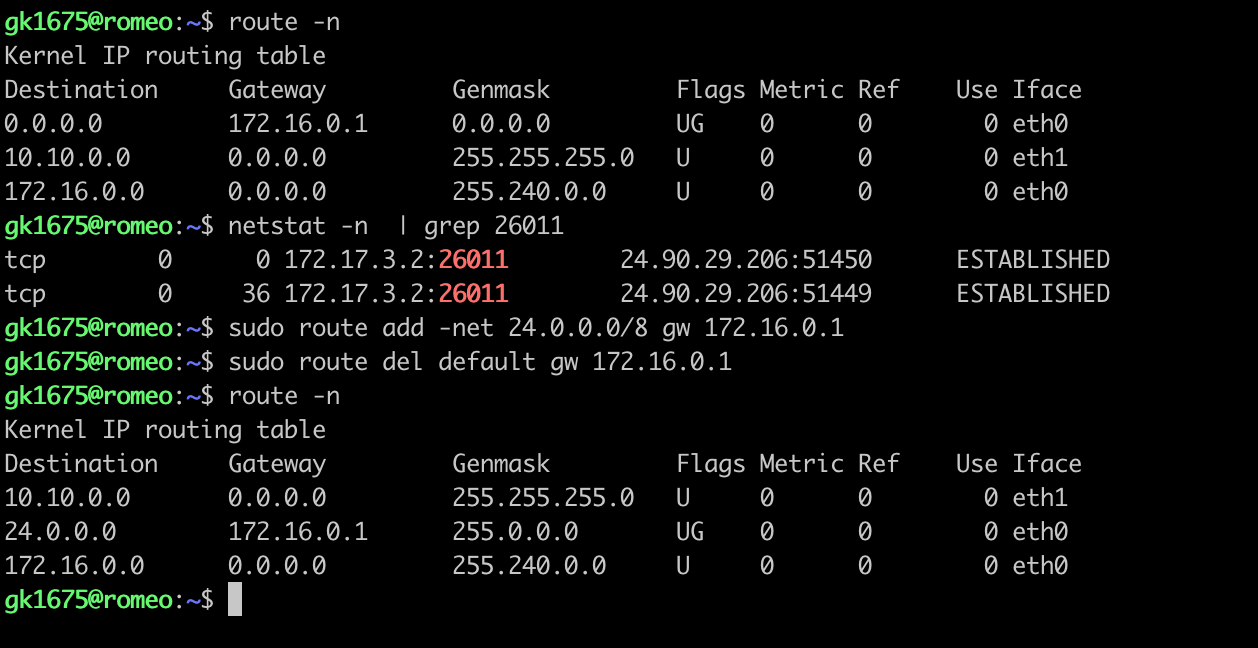

there is no default gateway rule (no rule with 0.0.0.0 as the destination)

Package capture after running the ping command:

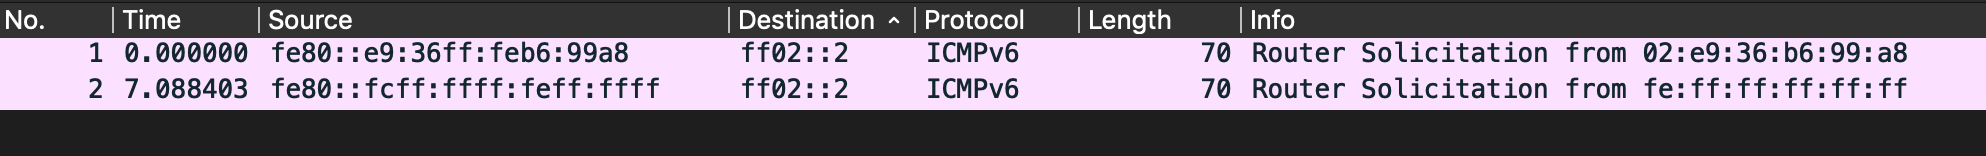

Q: Can you see any traffic sent on the network? Why? Explain what happened from the ping output.

A: No. When it pings 10.10.10.100, which is mapped to gateway 0.0.0.0 by the IP routing table. However, as the default gateway for destination 0.0.0.0 is removed, there is traffic for this ping.

Q: List the different ICMP messages you captured in the exercises in this section. Give the values of the type and code fields.

A: the messages are "router solicitation from 02:e9:36:b6:99:a8", and "router solicitation from fe:ff:ff:ff:ff:ff".  The type field is 133, and the code field is 0.

## Exercise 11

### part 1

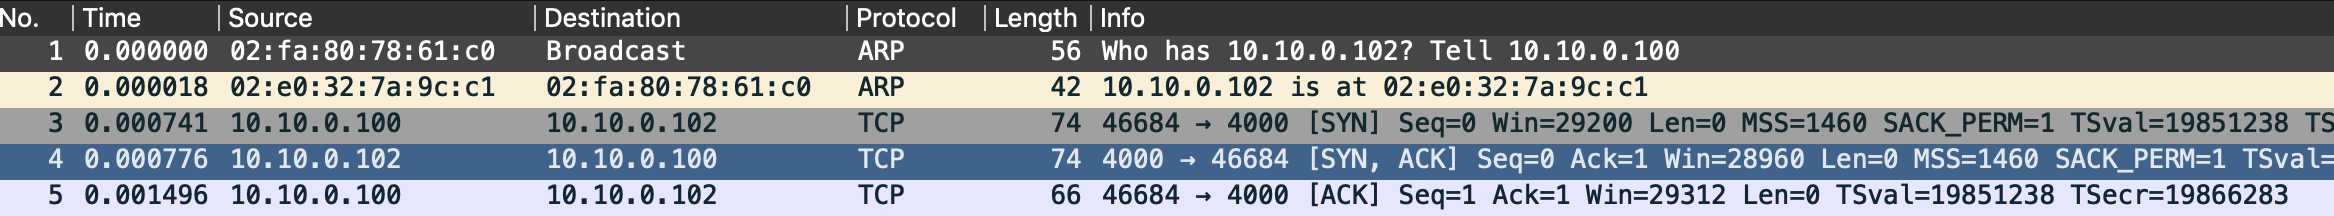

The netcat connection between "hamlet" and "romeo" are established. The netcat connection between "hamlet" and "romeo" are established. The ARP cache for "hamlet" and "romeo" have added the MAC address of each other, while the ARP tables of "juliet" and "ophelia" remain unchanged. 

### part 2

The netcat connection between "hamlet" and "romeo" are established. The netcat connection between "hamlet" and "romeo" are established. The ARP cache for "hamlet" and "romeo" have added the MAC address of each other, while the ARP tables of "juliet" and "ophelia" remain unchanged.

### part 3

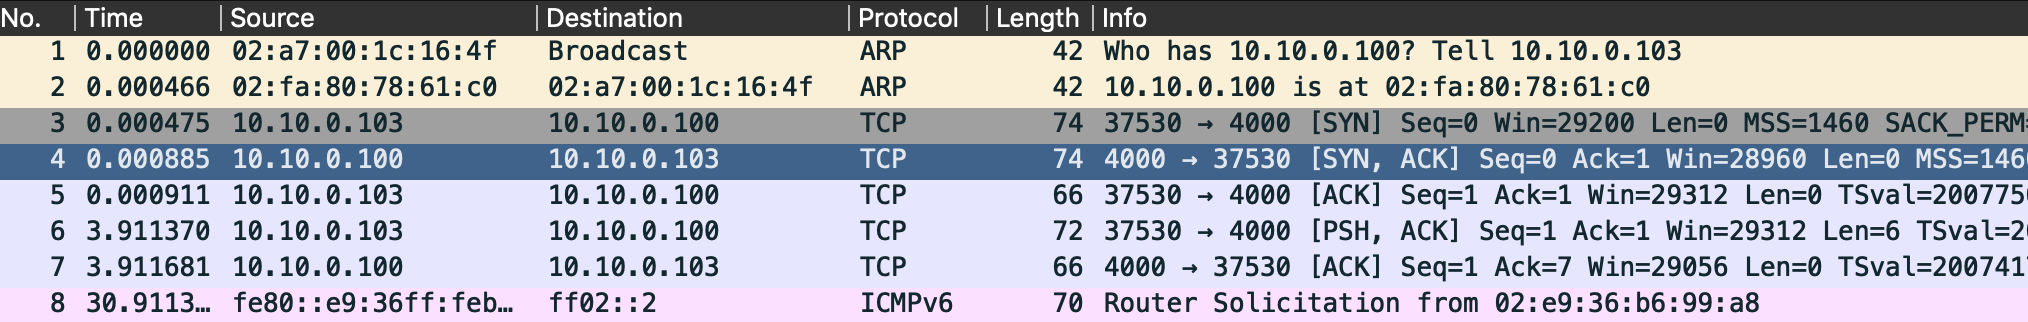

The netcat connection between "ophelia" and "romeo" are established. 

Q: Explain what happened in each case and why. Specifically, in part 2, between which two hosts was the netcat connection established? Why? In step 3, which host is connected to ophelia? Why?

A: In part 2, the netcat connection between "hamlet" and "romeo" is established. In step 3, "romeo" is connected to ophelia. This is because the host with the target IP address can be found within the same network.

## Exercise 12

### part 1

In the ARP tables, only romeo and hamlet have a link with each other in eth1 interface.  
When "hamlet" pings "romeo", an ARP messages is broadcasted in the network, asking the MAC address of 10.10.0.102. "romeo" and "juliet" can receive this ARP message, but not "ophelia". Then, "romeo" replies this ARP message by telling its MAC address to 10.10.0.100, the IP address of "hamlet".

### Part 2

The ARP table for all 4 hosts are not changed at all. There are only router solicitation message sent via ICMPv6 protocol captured in the 4 hosts. 

### part 3

From hamlet ping romeo, the ARP table is the same as part 1. As the MAC address is already in the ARP table of both "hamlet" and "romeo", there is no ARP request at the beginning, but rather Echo request and Echo reply were sent directly.

### part 4

When "juliet" pings "ophelia" via an ARP broadcast, asking the MAC address of 10.10.0.120, it does not get a reply.

Q: Explain what happened in each case according to the tcpdump outputs saved. 

A: as described above in each part.

Q: Explain why "ophelia" could not be reached from other hosts, whereas "romeo", which has the same subnet mask, could communicate with the other hosts. Use a bitwise analysis and explain how the netmask was applied.

A: with the last octec of the IP addresses of the 4 hosts listed below,    
100 = binary(01100100),   
101 = binary(01100101),   
102 = binary(01100110),   
120 = binary(01111000),   
After doing the and operation with:    
240 = binary(11110000), the first 4 bits remain in the same subnet, (they have the same first 4 bits 0110)    
100, 101 and 102 can map into the same subnet, however 120 cannot (it has 0111 as the first 4 bits).

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)